## Example code demonstrating use gpseer as an API

In [1]:
# Set up the environment
%matplotlib inline
from gpseer import utils, maximum_likelihood, cross_validate, plot

In [2]:
# Model parameters
threshold = 5
spline_order = 3
spline_smoothness = 100000
epistasis_order = 1

In [3]:
# Load data into a genotype-phenotype map
gpm = utils.read_file_to_gpmap("pfcrt-raw-data.csv")
gpm

,genotypes,phenotypes,n_replicates,stdeviations,binary,n_mutations
0,INTAESIR,9.7899,10,0.9723,00000000,0
1,MNTAESIR,5.1533,11,1.1537,10000000,1
2,MNTSQNTR,0.0001,4,0.7451,10011110,5
3,MNTSQSIR,5.2700,6,1.4200,10011000,3
4,MNTSENIR,2.2873,4,1.1312,10010100,3
5,MNTSENII,1.1714,3,2.3992,10010101,4
6,MNTSESIR,14.2018,8,1.4541,10010000,2
7,MEKAQNIR,0.1978,4,0.3183,11101100,5
8,MNTAQNIR,1.0752,7,0.5466,10001100,3
9,MNTAQNII,1.0280,4,0.7638,10001101,4


In [4]:
# Construct 
ml_model = utils.construct_model(threshold=threshold,
                                 spline_order=spline_order,
                                 spline_smoothness=spline_smoothness,
                                 epistasis_order=epistasis_order)
# Add genotype p
ml_model.add_gpm(gpm)
ml_model.fit()


/Users/harmsm/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[EpistasisLogisticRegression(model_type='global', threshold=5),
 EpistasisSpline(k=3, model_type='global', s=100000),
 EpistasisLinearRegression(model_type='global', n_jobs=1, order=1)]

In [5]:
# Make prediction
prediction_df = maximum_likelihood.predict_to_dataframe(ml_model)
prediction_df

,genotypes,phenotypes,uncertainty,measured,measured_err,n_replicates,prediction,prediction_err,phenotype_class,binary,n_mutations
0,INTAESIR,9.789900,0.97230,9.7899,0.9723,1,7.539980,10.59697,above,00000000,0
1,INTAESII,10.275038,10.59697,NaN,NaN,1,10.275038,10.59697,above,00000001,1
2,INTAESTR,8.146039,10.59697,NaN,NaN,1,8.146039,10.59697,above,00000010,1
3,INTAESTI,11.408303,10.59697,NaN,NaN,1,11.408303,10.59697,above,00000011,2
4,INTAENIR,5.000000,0.00000,NaN,NaN,1,5.000000,10.59697,below,00000100,1
...,...,...,...,...,...,...,...,...,...,...,...
251,MEKSQSTI,5.000000,0.00000,NaN,NaN,1,5.000000,10.59697,below,11111011,7
252,MEKSQNIR,5.000000,0.00000,NaN,NaN,1,5.000000,10.59697,below,11111100,6
253,MEKSQNII,5.000000,0.00000,NaN,NaN,1,5.000000,10.59697,below,11111101,7
254,MEKSQNTR,5.000000,0.00000,NaN,NaN,1,5.000000,10.59697,below,11111110,7


In [6]:
stats_df, convergence_df = maximum_likelihood.create_stats_output(ml_model)
stats_df

,parameter,value
0,num_genotypes,76
1,num_unique_mutations,8
2,unexplained variation (epistasis),0.195241
3,num_obs_to_converge,17.9642
4,threshold,5
5,spline_order,3
6,spline_smoothness,100000
7,epistasis_order,1


In [7]:
convergence_df

,mutation,num_obs,fold_target,converged
0,I0M,47,2.616312,True
1,N1E,46,2.560645,True
2,T2K,12,0.667994,False
3,A3S,41,2.282314,True
4,E4Q,35,1.948317,True
5,S5N,46,2.560645,True
6,I6T,28,1.558654,True
7,R7I,30,1.669986,True


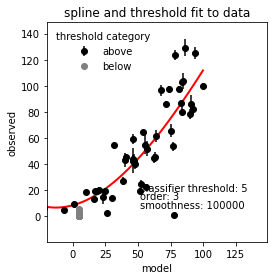

In [8]:
fig, ax = plot.plot_spline(ml_model,prediction_df)

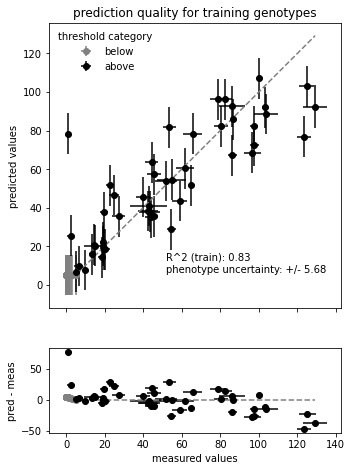

In [9]:
fig, ax = plot.plot_correlation(ml_model,prediction_df)
None

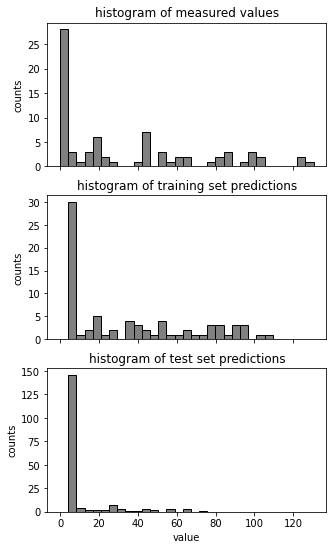

In [10]:
fig, ax = plot.plot_histograms(ml_model,prediction_df)
None

In [11]:

sub_model = utils.construct_model(threshold=threshold,
                                         spline_order=spline_order,
                                         spline_smoothness=spline_smoothness,
                                         epistasis_order=epistasis_order)

cv_df = cross_validate.cross_validate_to_dataframe(sub_model,gpm,n_samples=100,train_fraction=0.8)
cv_df

[GPSeer] └──>:   0%|          | 0/100 [00:00<?, ?it/s]/Users/harmsm/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[GPSeer] └──>:   1%|          | 1/100 [00:00<00:15,  6.51it/s]/Users/harmsm/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[GPSeer] └──>:   2%|▏         | 2/100 [00:00<00:15,  6.39it/s]/Users/harmsm/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[GPSeer] └──>:   3%|▎         | 3/100 [00:00<00:15,  6.16it/s]/Users/harmsm/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defaul

[GPSeer] └──>:  30%|███       | 30/100 [00:04<00:11,  6.10it/s]/Users/harmsm/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[GPSeer] └──>:  31%|███       | 31/100 [00:05<00:11,  6.23it/s]/Users/harmsm/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[GPSeer] └──>:  32%|███▏      | 32/100 [00:05<00:10,  6.27it/s]/Users/harmsm/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[GPSeer] └──>:  33%|███▎      | 33/100 [00:05<00:10,  6.41it/s]/Users/harmsm/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWar

[GPSeer] └──>:  60%|██████    | 60/100 [00:09<00:06,  6.67it/s]/Users/harmsm/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[GPSeer] └──>:  61%|██████    | 61/100 [00:09<00:05,  6.69it/s]/Users/harmsm/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[GPSeer] └──>:  62%|██████▏   | 62/100 [00:09<00:05,  6.88it/s]/Users/harmsm/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[GPSeer] └──>:  63%|██████▎   | 63/100 [00:09<00:05,  6.79it/s]/Users/harmsm/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWar

[GPSeer] └──>:  90%|█████████ | 90/100 [00:14<00:01,  6.43it/s]/Users/harmsm/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[GPSeer] └──>:  91%|█████████ | 91/100 [00:14<00:01,  6.31it/s]/Users/harmsm/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[GPSeer] └──>:  92%|█████████▏| 92/100 [00:14<00:01,  6.30it/s]/Users/harmsm/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[GPSeer] └──>:  93%|█████████▎| 93/100 [00:14<00:01,  6.45it/s]/Users/harmsm/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWar

,test_scores,train_scores
0,0.728323,0.835049
1,0.696786,0.829402
2,0.549355,0.834680
3,0.794907,0.825076
4,0.822616,0.807698
...,...,...
95,0.740927,0.847142
96,0.783282,0.831266
97,0.834874,0.820852
98,0.901439,0.814048


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x120669a58>)

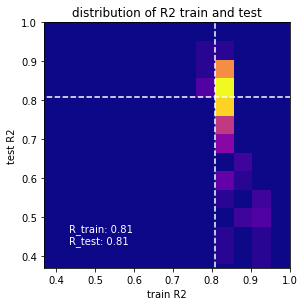

In [12]:
plot.plot_test_train(cv_df)

In [15]:
import pandas as pd
pd.read_csv("https://github.com/harmslab/gpseer/raw/master/examples/example-full.csv")

,genotypes,phenotypes
0,MSMLSMAK,-0.340449
1,MSMLSMAG,3.008274
2,MSMLSMSK,2.635991
3,MSMLSMSG,6.117208
4,MSMLSAAK,2.101568
...,...,...
251,WRHDAMSG,21.062406
252,WRHDAAAK,17.186788
253,WRHDAAAG,21.420543
254,WRHDAASK,21.058549
